|<h2>Course:</h2>|<h1><a href="https://udemy.com/course/deeplearning_x/?couponCode=202508" target="_blank">A deep understanding of deep learning</a></h1>|
|-|:-:|
|<h2>Section:</h2>|<h1>ANNs<h1>|
|<h2>Lecture:</h2>|<h1><b>ANN for regression<b></h1>|

<br>

<h5><b>Teacher:</b> Mike X Cohen, <a href="https://sincxpress.com" target="_blank">sincxpress.com</a></h5>
<h5><b>Course URL:</b> <a href="https://udemy.com/course/deeplearning_x/?couponCode=202508" target="_blank">udemy.com/course/deeplearning_x/?couponCode=202508</a></h5>
<i>Using the code without the course may lead to confusion or errors.</i>

In [1]:
# import libraries
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

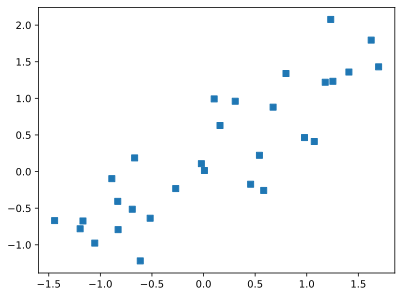

In [9]:
# create data

N = 30
x = torch.randn(N,1)
y = x + torch.randn(N,1)/2

# and plot
plt.plot(x,y,'s')
plt.show()

In [10]:
# build model
ANNreg = nn.Sequential(
    nn.Linear(1,1),  # input layer
    nn.ReLU(),       # activation function
    nn.Linear(1,1)   # output layer
    )

ANNreg

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
)

In [11]:
# learning rate
learningRate = .05

# loss function
lossfun = nn.MSELoss()

# optimizer (the flavor of gradient descent to implement)
optimizer = torch.optim.SGD(ANNreg.parameters(),lr=learningRate)

In [12]:
# train the model
numepochs = 500
losses = torch.zeros(numepochs)


## Train the model!
for epochi in range(numepochs):

  # forward pass
  yHat = ANNreg(x)

  # compute loss
  loss = lossfun(yHat,y)
  losses[epochi] = loss

  # backprop
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

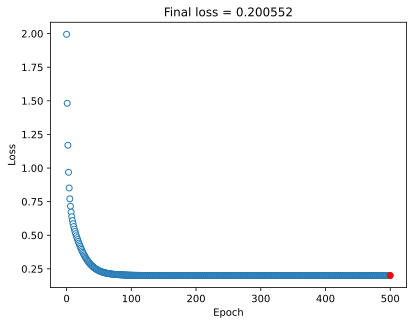

In [13]:
# show the losses

# manually compute losses
# final forward pass
predictions = ANNreg(x)

# final loss (MSE)
testloss = (predictions-y).pow(2).mean()

plt.plot(losses.detach(),'o',markerfacecolor='w',linewidth=.1)
plt.plot(numepochs,testloss.detach(),'ro')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Final loss = %g' %testloss.item())
plt.show()

In [14]:
testloss.item()

0.20055212080478668

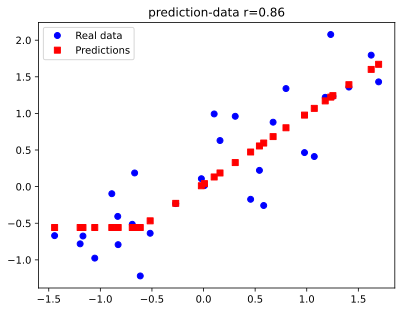

In [17]:
# plot the data
plt.plot(x,y,'bo',label='Real data')
plt.plot(x,predictions.detach(),'rs',label='Predictions')
plt.title(f'prediction-data r={np.corrcoef(y.T,predictions.detach().T)[0,1]:.2f}')
plt.legend()
plt.show()

# Additional explorations

In [ ]:
# 1) How much data is "enough"? Try different values of N and see how low the loss gets.
#    Do you still get low loss ("low" is subjective, but let's say loss<.25) with N=10? N=5?
#
# 2) Does your conclusion above depend on the amount of noise in the data? Try changing the noise level
#    by changing the division ("/2") when creating y as x+randn.
#
# 3) Notice that the model doesn't always work well. Put the original code (that is, N=30 and /2 noise)
#    into a function or a for-loop and repeat the training 100 times (each time using a fresh model instance).
#    Then count the number of times the model had a loss>.25.

**For code challenge**


In [18]:
def builtAndTrain(x,y):

  # build model
  ANNreg = nn.Sequential(
      nn.Linear(1,1),  # input layer
      nn.ReLU(),       # activation function
      nn.Linear(1,1)   # output layer
    )

  # learning rate
  learningRate = .05

  # loss function
  lossfun = nn.MSELoss()

  # optimizer (the flavor of gradient descent to implement)
  optimizer = torch.optim.SGD(ANNreg.parameters(),lr=learningRate)

    # train the model
  numepochs = 500
  losses = torch.zeros(numepochs)


  ## Train the model!
  for epochi in range(numepochs):

    # forward pass. The initial prediction
    yHat = ANNreg(x)

    # compute loss -> MSE between the prediction and the data
    loss = lossfun(yHat,y)
    losses[epochi] = loss

    # backprop -> Back prop to help the model learn
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  # final forward pass
  predictions = ANNreg(x)

  # final loss (MSE)
  testloss = (predictions-y).pow(2).mean()

  return predictions, testloss

In [19]:
def fCreateData(m):

  N = 50
  x = torch.randn(N,1)
  y = m*x + (torch.randn(1)/2)
  return x,y

Text(0.5, 1.0, 'prediction-data r=0.99')

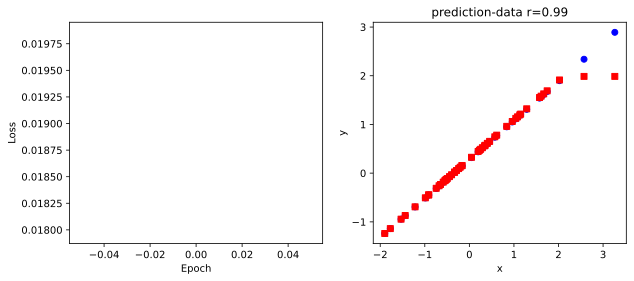

In [85]:
x,y = fCreateData(0.8)
prediction,loss = builtAndTrain(x,y)

fig, ax = plt.subplots(1,2,figsize=(10,4))

ax[0].plot(np.linspace(0,500,1),loss.detach().numpy())
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')

ax[1].plot(x.T,y.T,'bo',label='Real data')
ax[1].plot(x,prediction.detach(),'rs',label='Predictions')
ax[1].set_ylabel('y')
ax[1].set_xlabel('x')
ax[1].set_title(f'prediction-data r={np.corrcoef(y.T,prediction.detach().T)[0,1]:.2f}')



In [95]:
# vary the slope in parametric experiment
slopes = np.linspace(-2,2,21)
nreps = 50

# create empty matrices
accuracy = np.zeros((len(slopes),nreps))
losses = np.zeros((len(slopes),nreps))

for islope,slope in enumerate(slopes):
  for irep in range(nreps):
    x,y = fCreateData(slope)
    prediction,loss = builtAndTrain(x,y)
    accuracy[islope,irep] = np.min(np.corrcoef(prediction.detach().numpy(),y.detach().numpy(),rowvar=False))
    losses[islope,irep] = loss
accuracy[np.isnan(accuracy)] = 0

/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


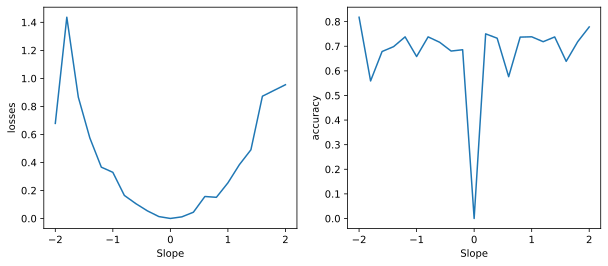

In [96]:
fig, axes = plt.subplots(1,2,figsize=(10,4))

y_titles = ['losses','accuracy']
for idx, var in enumerate([losses, accuracy]):
  ax = axes[idx]
  ax.plot(slopes,var.mean(axis = 1))
  ax.set_xlabel('Slope')
  ax.set_ylabel(y_titles[idx])
